# Covid Prognosis Dataset

# Integrantes
Lucas Cardoso Lazari 8927439

Diogo José Costa Alves 13709881

Lucas de Angelis Oliveira 8989189

Thales Vinicius Gomes 9814265

# Descrição do dataset
Os dados a serem utilizados no projeto são provenientes de um estudo realizado em pacientes infectados por COVID-19 (doi.org/10.1080/20002297.2022.2043651). Neste estudo, o nível de proteínas em amostras de soro de pacientes internados e não internados por COVID-19 foram avaliados, portanto, o dataset consiste em uma série de features que correspondem a proteínas identificadas e um valor de intensidade da sua medida para cada paciente. A proposta do projeto é utilizar este dataset para treinar modelos para classificar os pacientes em alto risco (internados) ou baixo risco (não internados) baseado nos valores de intensidade das proteínas identificadas. São no total 132 amostras para treinamento/validação e 64 amostras para teste. Ambos os datasets (treino e teste) estão desbalanceados. O objetivo é melhorar o que foi feito no estudo publicado, visando aumentar a performance de classificação no dataset de teste.

---

# EDA - Exploratory Data Analysis

### 1) Importação de bibliotecas e definições básicas

In [1]:
# Importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignora avisos de bibliotecas
warnings.filterwarnings("ignore")

In [2]:
# Parâmetros de gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Parâmetros do Pandas
pd.set_option("display.max_columns", None)

In [4]:
TRAIN_CLINICAL_FILENAME = "train_set_clinical.csv"

---

### 2) Leitura dos dados

In [5]:
train = pd.read_csv(TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID")
print(f'Train shape: {train.shape}')
train.head()

Train shape: (132, 561)


,Age (Y),Sex,Fever,Cough,Headache,Sore throat,Muscle or Body Aches,Fadigue,Congestion or runny nose,Shortness of breath or difficulty breathing,Loss of smell,Loss of taste,Nausea or vomiting,Diarrhea,Freq.1198.26559877594,Freq.1204.07148226988,Freq.1211.13623593336,Freq.1217.73683596229,Freq.1223.16958659828,Freq.1234.45996741201,Freq.1239.41043347512,Freq.1244.8230732813,Freq.1254.64710066874,Freq.1261.3335177338,Freq.1265.82256301628,Freq.1270.76383114603,Freq.1277.21955007992,Freq.1282.63038110065,Freq.1293.8262919313,Freq.1299.01548864549,Freq.1305.53600567066,Freq.1310.30721649596,Freq.1315.70287569916,Freq.1320.95280783611,Freq.1324.07107187346,Freq.1327.55594407333,Freq.1331.58108934976,Freq.1339.98465957893,Freq.1348.30359762795,Freq.1357.3302556267,Freq.1362.95672607895,Freq.1368.63712906355,Freq.1372.78726661417,Freq.1377.50566247202,Freq.1383.30614758294,Freq.1389.01002905644,Freq.1394.04706384502,Freq.1399.46591504505,Freq.1404.9770099754,Freq.1409.98660647541,Freq.1421.59825430093,Freq.1427.22328919778,Freq.1431.99555134908,Freq.1438.83829046163,Freq.1443.30860845782,Freq.1447.04601543146,Freq.1453.37891443563,Freq.1455.61856178144,Freq.1459.14779913894,Freq.1464.16616494834,Freq.1470.12429734374,Freq.1477.70491383112,Freq.1485.96183531952,Freq.1497.82186371488,Freq.1508.30051240373,Freq.1514.70175609701,Freq.1517.9309481104,Freq.1522.99914751846,Freq.1527.39516015678,Freq.1533.30795661024,Freq.1538.31602411884,Freq.1544.98929953576,Freq.1549.49309231742,Freq.1554.07333161833,Freq.1560.9895266147,Freq.1566.24211112699,Freq.1571.40357692951,Freq.1577.48308092878,Freq.1584.02233200636,Freq.1591.10458447021,Freq.1595.34483768409,Freq.1604.19161332962,Freq.1608.38146933202,Freq.1611.2790141662,Freq.1619.20659524003,Freq.1625.73700133003,Freq.1633.09995837317,Freq.1636.70326472529,Freq.1640.57354450481,Freq.1649.08923599114,Freq.1655.9357306698,Freq.1663.53390642038,Freq.1671.33229659277,Freq.1677.66154555675,Freq.1687.94421312109,Freq.1694.15595567599,Freq.1699.33964318075,Freq.1704.42930680295,Freq.1709.23603195157,Freq.1715.83254187774,Freq.1721.0445200256,Freq.1726.1218533815,Freq.1730.61176155317,Freq.1740.12061901788,Freq.1745.76853759143,Freq.1747.90171482395,Freq.1756.92156671187,Freq.1765.64530443748,Freq.1769.80913741996,Freq.1773.37633931942,Freq.1780.88493187677,Freq.1785.53231760815,Freq.1794.21713030157,Freq.1799.33573844496,Freq.1809.9376813828,Freq.1819.70807089389,Freq.1822.98096756247,Freq.1830.53919878988,Freq.1835.23106901483,Freq.1840.39039983956,Freq.1850.64800128555,Freq.1870.04861014773,Freq.1874.49674198111,Freq.1880.59799181238,Freq.1891.79979750232,Freq.1898.30039812008,Freq.1903.47054385617,Freq.1909.2831633465,Freq.1913.92305980564,Freq.1920.72740465753,Freq.1934.48780363476,Freq.1944.90875784519,Freq.1952.03998687636,Freq.1958.3495860463,Freq.1963.39911937946,Freq.1972.76549068372,Freq.1979.64369462372,Freq.1987.25255033859,Freq.1995.9614532679,Freq.2004.50275606657,Freq.2014.46458166521,Freq.2021.18653447404,Freq.2027.52807710778,Freq.2032.98713905056,Freq.2044.7602330004,Freq.2052.46119506721,Freq.2058.24533424833,Freq.2062.07118114004,Freq.2070.64668714971,Freq.2074.73630640089,Freq.2079.94829884854,Freq.2090.24948361221,Freq.2100.44990262345,Freq.2113.05210215706,Freq.2122.13297897706,Freq.2128.21099676403,Freq.2136.27277429152,Freq.2143.04419457772,Freq.2147.21242083795,Freq.2153.36693907769,Freq.2158.94144479153,Freq.2164.87766710266,Freq.2171.83189597593,Freq.2177.00514262858,Freq.2182.54012190969,Freq.2187.26929655148,Freq.2194.7777838603,Freq.2202.76867207212,Freq.2211.85973125791,Freq.2216.7979248852,Freq.2224.44106274883,Freq.2230.18830781363,Freq.2241.01398322552,Freq.2245.38681433931,Freq.2251.02104963954,Freq.2257.4726297862,Freq.2266.56112591748,Freq.2273.50729921173,Freq.2280.56970760484,Freq.2290.87593912886,Freq.2301.51851513891,Freq.2305.45252886063,Freq.2309.54505260663,Freq.2313.65480260929,Freq.2325.67019406475,Freq.2334.75027257614,Freq.2340.20217597623,Freq.2352.814

- Todas as colunas com o nome iniciando em "Freq." são de medições de proteínas.

In [6]:
label_col = ['Group']
protein_cols = [col for col in train.columns if "Freq" in col]
clinical_cols = list(set(train.columns) - set(protein_cols + label_col))
symptoms_cols = [col for col in clinical_cols if col not in ["Age (Y)", "Sex"]]

---

### 3) Explorando os dados

In [7]:
train.describe()

,Age (Y),Fever,Cough,Headache,Sore throat,Muscle or Body Aches,Fadigue,Congestion or runny nose,Shortness of breath or difficulty breathing,Loss of smell,Loss of taste,Nausea or vomiting,Diarrhea,Freq.1198.26559877594,Freq.1204.07148226988,Freq.1211.13623593336,Freq.1217.73683596229,Freq.1223.16958659828,Freq.1234.45996741201,Freq.1239.41043347512,Freq.1244.8230732813,Freq.1254.64710066874,Freq.1261.3335177338,Freq.1265.82256301628,Freq.1270.76383114603,Freq.1277.21955007992,Freq.1282.63038110065,Freq.1293.8262919313,Freq.1299.01548864549,Freq.1305.53600567066,Freq.1310.30721649596,Freq.1315.70287569916,Freq.1320.95280783611,Freq.1324.07107187346,Freq.1327.55594407333,Freq.1331.58108934976,Freq.1339.98465957893,Freq.1348.30359762795,Freq.1357.3302556267,Freq.1362.95672607895,Freq.1368.63712906355,Freq.1372.78726661417,Freq.1377.50566247202,Freq.1383.30614758294,Freq.1389.01002905644,Freq.1394.04706384502,Freq.1399.46591504505,Freq.1404.9770099754,Freq.1409.98660647541,Freq.1421.59825430093,Freq.1427.22328919778,Freq.1431.99555134908,Freq.1438.83829046163,Freq.1443.30860845782,Freq.1447.04601543146,Freq.1453.37891443563,Freq.1455.61856178144,Freq.1459.14779913894,Freq.1464.16616494834,Freq.1470.12429734374,Freq.1477.70491383112,Freq.1485.96183531952,Freq.1497.82186371488,Freq.1508.30051240373,Freq.1514.70175609701,Freq.1517.9309481104,Freq.1522.99914751846,Freq.1527.39516015678,Freq.1533.30795661024,Freq.1538.31602411884,Freq.1544.98929953576,Freq.1549.49309231742,Freq.1554.07333161833,Freq.1560.9895266147,Freq.1566.24211112699,Freq.1571.40357692951,Freq.1577.48308092878,Freq.1584.02233200636,Freq.1591.10458447021,Freq.1595.34483768409,Freq.1604.19161332962,Freq.1608.38146933202,Freq.1611.2790141662,Freq.1619.20659524003,Freq.1625.73700133003,Freq.1633.09995837317,Freq.1636.70326472529,Freq.1640.57354450481,Freq.1649.08923599114,Freq.1655.9357306698,Freq.1663.53390642038,Freq.1671.33229659277,Freq.1677.66154555675,Freq.1687.94421312109,Freq.1694.15595567599,Freq.1699.33964318075,Freq.1704.42930680295,Freq.1709.23603195157,Freq.1715.83254187774,Freq.1721.0445200256,Freq.1726.1218533815,Freq.1730.61176155317,Freq.1740.12061901788,Freq.1745.76853759143,Freq.1747.90171482395,Freq.1756.92156671187,Freq.1765.64530443748,Freq.1769.80913741996,Freq.1773.37633931942,Freq.1780.88493187677,Freq.1785.53231760815,Freq.1794.21713030157,Freq.1799.33573844496,Freq.1809.9376813828,Freq.1819.70807089389,Freq.1822.98096756247,Freq.1830.53919878988,Freq.1835.23106901483,Freq.1840.39039983956,Freq.1850.64800128555,Freq.1870.04861014773,Freq.1874.49674198111,Freq.1880.59799181238,Freq.1891.79979750232,Freq.1898.30039812008,Freq.1903.47054385617,Freq.1909.2831633465,Freq.1913.92305980564,Freq.1920.72740465753,Freq.1934.48780363476,Freq.1944.90875784519,Freq.1952.03998687636,Freq.1958.3495860463,Freq.1963.39911937946,Freq.1972.76549068372,Freq.1979.64369462372,Freq.1987.25255033859,Freq.1995.9614532679,Freq.2004.50275606657,Freq.2014.46458166521,Freq.2021.18653447404,Freq.2027.52807710778,Freq.2032.98713905056,Freq.2044.7602330004,Freq.2052.46119506721,Freq.2058.24533424833,Freq.2062.07118114004,Freq.2070.64668714971,Freq.2074.73630640089,Freq.2079.94829884854,Freq.2090.24948361221,Freq.2100.44990262345,Freq.2113.05210215706,Freq.2122.13297897706,Freq.2128.21099676403,Freq.2136.27277429152,Freq.2143.04419457772,Freq.2147.21242083795,Freq.2153.36693907769,Freq.2158.94144479153,Freq.2164.87766710266,Freq.2171.83189597593,Freq.2177.00514262858,Freq.2182.54012190969,Freq.2187.26929655148,Freq.2194.7777838603,Freq.2202.76867207212,Freq.2211.85973125791,Freq.2216.7979248852,Freq.2224.44106274883,Freq.2230.18830781363,Freq.2241.01398322552,Freq.2245.38681433931,Freq.2251.02104963954,Freq.2257.4726297862,Freq.2266.56112591748,Freq.2273.50729921173,Freq.2280.56970760484,Freq.2290.87593912886,Freq.2301.51851513891,Freq.2305.45252886063,Freq.2309.54505260663,Freq.2313.65480260929,Freq.2325.67019406475,Freq.2334.75027257614,Freq.2340.20217597623,Freq.2352.8145161

#### 3.1) Análise dos dados faltantes

In [8]:
print(f'Total de dados faltantes do dataset: {train.isna().sum().sum()}')
print(f'Quantidade de dados no dataset: {train.size}')
print(f'Representatividade dos faltantes: {round(train.isna().sum().sum() / train.size * 100, 4)}%')

Total de dados faltantes do dataset: 12
Quantidade de dados no dataset: 74052
Representatividade dos faltantes: 0.0162%


In [9]:
# Check missing values - TRAIN
train.isna().sum().to_frame().sort_values(0, ascending=False).head()

,0
Loss of smell,1
Fever,1
Cough,1
Headache,1
Sore throat,1


In [10]:
train[train.isna().any(1)]

,Age (Y),Sex,Fever,Cough,Headache,Sore throat,Muscle or Body Aches,Fadigue,Congestion or runny nose,Shortness of breath or difficulty breathing,Loss of smell,Loss of taste,Nausea or vomiting,Diarrhea,Freq.1198.26559877594,Freq.1204.07148226988,Freq.1211.13623593336,Freq.1217.73683596229,Freq.1223.16958659828,Freq.1234.45996741201,Freq.1239.41043347512,Freq.1244.8230732813,Freq.1254.64710066874,Freq.1261.3335177338,Freq.1265.82256301628,Freq.1270.76383114603,Freq.1277.21955007992,Freq.1282.63038110065,Freq.1293.8262919313,Freq.1299.01548864549,Freq.1305.53600567066,Freq.1310.30721649596,Freq.1315.70287569916,Freq.1320.95280783611,Freq.1324.07107187346,Freq.1327.55594407333,Freq.1331.58108934976,Freq.1339.98465957893,Freq.1348.30359762795,Freq.1357.3302556267,Freq.1362.95672607895,Freq.1368.63712906355,Freq.1372.78726661417,Freq.1377.50566247202,Freq.1383.30614758294,Freq.1389.01002905644,Freq.1394.04706384502,Freq.1399.46591504505,Freq.1404.9770099754,Freq.1409.98660647541,Freq.1421.59825430093,Freq.1427.22328919778,Freq.1431.99555134908,Freq.1438.83829046163,Freq.1443.30860845782,Freq.1447.04601543146,Freq.1453.37891443563,Freq.1455.61856178144,Freq.1459.14779913894,Freq.1464.16616494834,Freq.1470.12429734374,Freq.1477.70491383112,Freq.1485.96183531952,Freq.1497.82186371488,Freq.1508.30051240373,Freq.1514.70175609701,Freq.1517.9309481104,Freq.1522.99914751846,Freq.1527.39516015678,Freq.1533.30795661024,Freq.1538.31602411884,Freq.1544.98929953576,Freq.1549.49309231742,Freq.1554.07333161833,Freq.1560.9895266147,Freq.1566.24211112699,Freq.1571.40357692951,Freq.1577.48308092878,Freq.1584.02233200636,Freq.1591.10458447021,Freq.1595.34483768409,Freq.1604.19161332962,Freq.1608.38146933202,Freq.1611.2790141662,Freq.1619.20659524003,Freq.1625.73700133003,Freq.1633.09995837317,Freq.1636.70326472529,Freq.1640.57354450481,Freq.1649.08923599114,Freq.1655.9357306698,Freq.1663.53390642038,Freq.1671.33229659277,Freq.1677.66154555675,Freq.1687.94421312109,Freq.1694.15595567599,Freq.1699.33964318075,Freq.1704.42930680295,Freq.1709.23603195157,Freq.1715.83254187774,Freq.1721.0445200256,Freq.1726.1218533815,Freq.1730.61176155317,Freq.1740.12061901788,Freq.1745.76853759143,Freq.1747.90171482395,Freq.1756.92156671187,Freq.1765.64530443748,Freq.1769.80913741996,Freq.1773.37633931942,Freq.1780.88493187677,Freq.1785.53231760815,Freq.1794.21713030157,Freq.1799.33573844496,Freq.1809.9376813828,Freq.1819.70807089389,Freq.1822.98096756247,Freq.1830.53919878988,Freq.1835.23106901483,Freq.1840.39039983956,Freq.1850.64800128555,Freq.1870.04861014773,Freq.1874.49674198111,Freq.1880.59799181238,Freq.1891.79979750232,Freq.1898.30039812008,Freq.1903.47054385617,Freq.1909.2831633465,Freq.1913.92305980564,Freq.1920.72740465753,Freq.1934.48780363476,Freq.1944.90875784519,Freq.1952.03998687636,Freq.1958.3495860463,Freq.1963.39911937946,Freq.1972.76549068372,Freq.1979.64369462372,Freq.1987.25255033859,Freq.1995.9614532679,Freq.2004.50275606657,Freq.2014.46458166521,Freq.2021.18653447404,Freq.2027.52807710778,Freq.2032.98713905056,Freq.2044.7602330004,Freq.2052.46119506721,Freq.2058.24533424833,Freq.2062.07118114004,Freq.2070.64668714971,Freq.2074.73630640089,Freq.2079.94829884854,Freq.2090.24948361221,Freq.2100.44990262345,Freq.2113.05210215706,Freq.2122.13297897706,Freq.2128.21099676403,Freq.2136.27277429152,Freq.2143.04419457772,Freq.2147.21242083795,Freq.2153.36693907769,Freq.2158.94144479153,Freq.2164.87766710266,Freq.2171.83189597593,Freq.2177.00514262858,Freq.2182.54012190969,Freq.2187.26929655148,Freq.2194.7777838603,Freq.2202.76867207212,Freq.2211.85973125791,Freq.2216.7979248852,Freq.2224.44106274883,Freq.2230.18830781363,Freq.2241.01398322552,Freq.2245.38681433931,Freq.2251.02104963954,Freq.2257.4726297862,Freq.2266.56112591748,Freq.2273.50729921173,Freq.2280.56970760484,Freq.2290.87593912886,Freq.2301.51851513891,Freq.2305.45252886063,Freq.2309.54505260663,Freq.2313.65480260929,Freq.2325.67019406475,Freq.2334.75027257614,Freq.2340.20217597623,Freq.2352.814

- Temos apenas um caso com dados faltantes no dataset de treino, sendo que estes são apenas de dados sintomáticos, não de proteínas.

#### 3.2) Distribuição da variável alvo

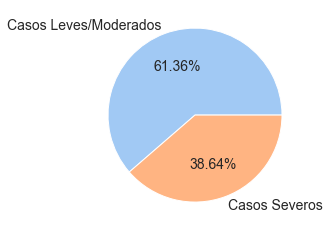

In [11]:
plt.pie(
    train['Group'].value_counts(normalize=True),
    labels=['Casos Leves/Moderados', 'Casos Severos'],
    colors= sns.color_palette('pastel')[:2],
    autopct='%.2f%%',
    textprops={'fontsize': 14}
    )
plt.show()

- Não há uma distribuição igualitária da variável de interesse no dataset, porém a diferença não é grande o suficiente para justificar medidas de balanceamento (oversampling, undersampling, etc)

#### 3.3) Checagem de valores iguais a 0

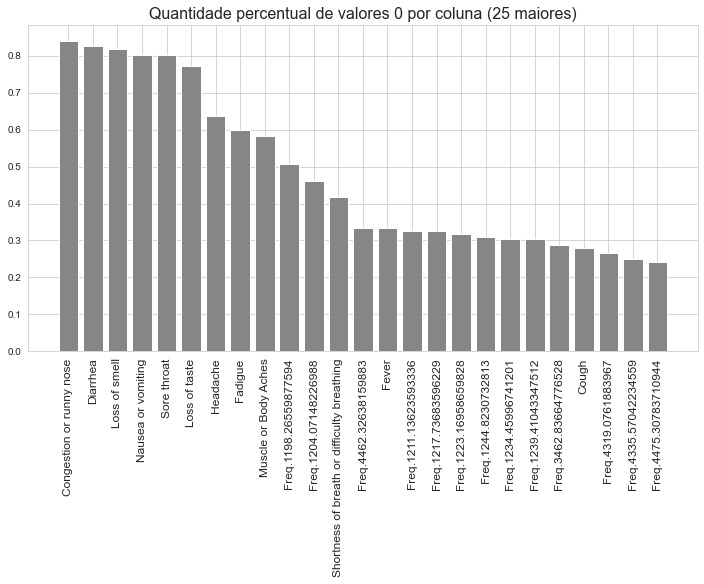

In [12]:
train_zeros = np.sum(train==0).to_frame().sort_values(0, ascending=False).rename({0:"qt_0"}, axis=1)
train_zeros["%_qt_0"] = train_zeros["qt_0"]/train.shape[0]

plt.figure(figsize=(12,6))
plt.bar(train_zeros.index[:25], train_zeros["%_qt_0"][:25], color='#868687')
plt.title('Quantidade percentual de valores 0 por coluna (25 maiores)', fontdict={'fontsize':16})
plt.xticks(rotation = 90, fontsize=12)
plt.show()

- Existem features com grande quantidades de zeros (algumas mais da metade)
- A maior parte dos valores 0 estão concentrados nas colunas de dados clínicos, o que faz sentido tendo em vista que são dados binários e que há menos casos de doença severa no dataset

#### 3.4) Distribuição das variáveis sintomáticas e clínicas em relação aos casos da doença

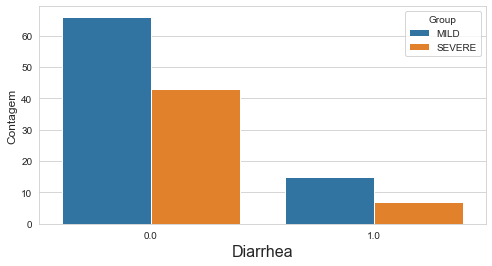

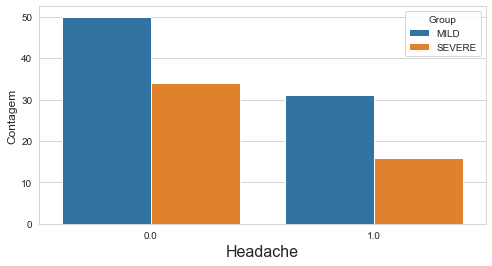

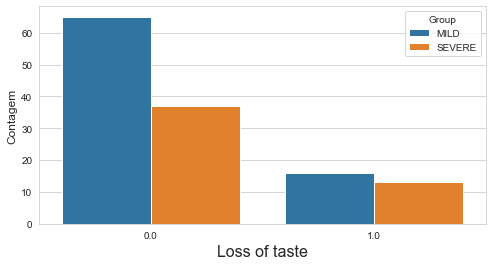

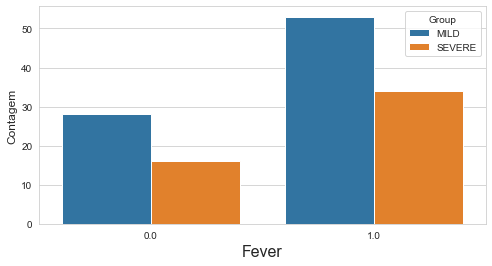

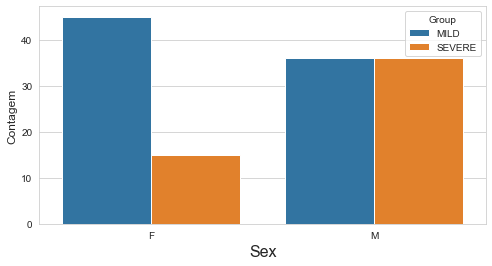

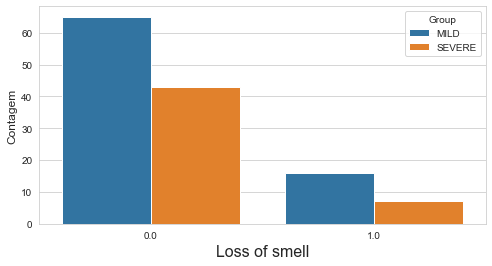

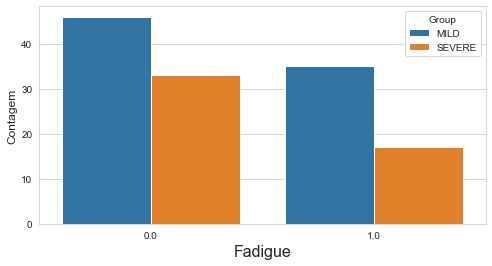

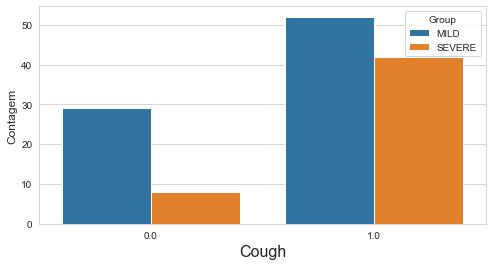

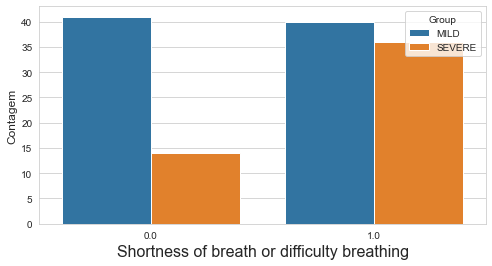

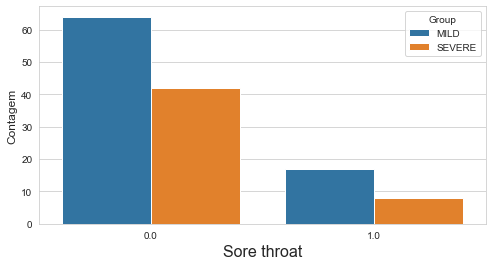

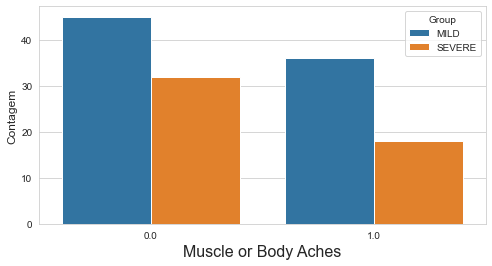

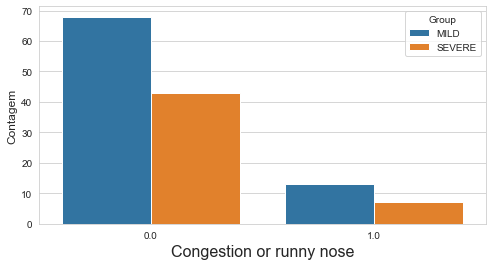

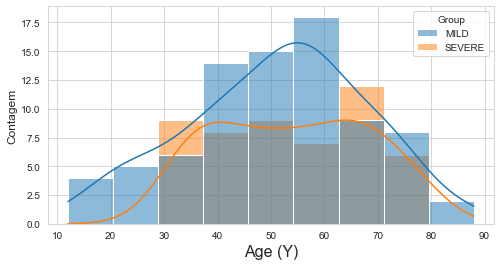

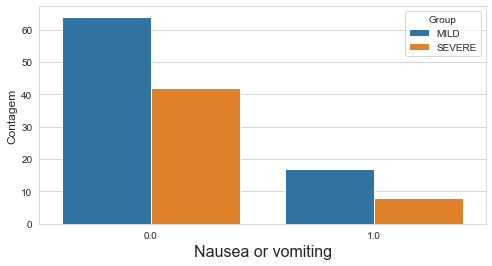

In [13]:
# Clinical Features Distribution
for col in clinical_cols:
    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    if col not in ['Age (Y)']:
        _ = sns.countplot(data=train, x=col, hue='Group')
    else:
        _ =sns.histplot(data=train, x=col, hue='Group', kde=True)
        
    plt.xlabel(xlabel=col, fontdict={'fontsize':16})
    plt.ylabel(ylabel="Contagem", fontdict={'fontsize':12})

#### Concentração dos sintomas por caso da doença

In [14]:
df_symptoms = pd.merge(train[symptoms_cols], train['Group'], on='ID')
df_symptoms.groupby(['Group']).mean()

,Diarrhea,Headache,Loss of taste,Fever,Loss of smell,Fadigue,Cough,Shortness of breath or difficulty breathing,Sore throat,Muscle or Body Aches,Congestion or runny nose,Nausea or vomiting
Group,,,,,,,,,,,,
MILD,0.185185,0.382716,0.197531,0.654321,0.197531,0.432099,0.641975,0.493827,0.209877,0.444444,0.160494,0.209877
SEVERE,0.140000,0.320000,0.260000,0.680000,0.140000,0.340000,0.840000,0.720000,0.160000,0.360000,0.140000,0.160000


- Interpretação: como os dados são binários, a média indica a % de vezes que o sintoma apareceu. <br>
Por exemplo: Fever x Severe = 0.68 significa que 68% dos casos severos apresentaram febre como sintoma

#### 3.4.2) Analisando os casos da doença por sexo e faixas etárias

In [15]:
# Criando a faixa de grupos etários
train["age_group"] = ""
train.loc[train["Age (Y)"] <= 13, "age_group"] = "0 - 13"
train.loc[(train["Age (Y)"] > 13) & (train["Age (Y)"] <= 21), "age_group"] = "13 - 21"
train.loc[(train["Age (Y)"] > 21) & (train["Age (Y)"] <= 50), "age_group"] = "21 - 50"
train.loc[(train["Age (Y)"] > 50) & (train["Age (Y)"] <= 70), "age_group"] = "50 - 70"
train.loc[(train["Age (Y)"] > 70) & (train["Age (Y)"] <= 100), "age_group"] = "70 - 100"

# Analisando os resultados
pd.crosstab(index=[train['age_group'], train['Sex']], columns=train['Group'])

Group          MILD  SEVERE
age_group Sex              
0 - 13    F       1       0
13 - 21   F       3       0
          M       1       0
21 - 50   F      14       4
          M      15      18
50 - 70   F      21      10
          M      16      13
70 - 100  F       6       1
          M       4       5

- Não existem casos severos para idades até 21 anos
- A maioria dos casos severos se encontra em pacientes do sexo masculino com idade entre 21 e 50 anos
- Para o sexo feminino a faixa etária com mais casos severos é a de 50 a 70 anos

#### 3.5) Analisando a diferença da média dos valores das proteínas por caso de doença

##### Antes de tudo, precisamos escalar as concentrações de proteínas para podermos ter um efeito comparativo entre as mesmas. Uma diferença média de 0,01 entre um caso leve e moderado da proteína A pode não ter o mesmo peso que a mesma diferença para a proteína B

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaled_protein_df = pd.DataFrame(index=train.index,
                          data=MinMaxScaler().fit_transform(train[protein_cols]),
                          columns=[i for i in train[protein_cols]])
scaled_protein_df

,Freq.1198.26559877594,Freq.1204.07148226988,Freq.1211.13623593336,Freq.1217.73683596229,Freq.1223.16958659828,Freq.1234.45996741201,Freq.1239.41043347512,Freq.1244.8230732813,Freq.1254.64710066874,Freq.1261.3335177338,Freq.1265.82256301628,Freq.1270.76383114603,Freq.1277.21955007992,Freq.1282.63038110065,Freq.1293.8262919313,Freq.1299.01548864549,Freq.1305.53600567066,Freq.1310.30721649596,Freq.1315.70287569916,Freq.1320.95280783611,Freq.1324.07107187346,Freq.1327.55594407333,Freq.1331.58108934976,Freq.1339.98465957893,Freq.1348.30359762795,Freq.1357.3302556267,Freq.1362.95672607895,Freq.1368.63712906355,Freq.1372.78726661417,Freq.1377.50566247202,Freq.1383.30614758294,Freq.1389.01002905644,Freq.1394.04706384502,Freq.1399.46591504505,Freq.1404.9770099754,Freq.1409.98660647541,Freq.1421.59825430093,Freq.1427.22328919778,Freq.1431.99555134908,Freq.1438.83829046163,Freq.1443.30860845782,Freq.1447.04601543146,Freq.1453.37891443563,Freq.1455.61856178144,Freq.1459.14779913894,Freq.1464.16616494834,Freq.1470.12429734374,Freq.1477.70491383112,Freq.1485.96183531952,Freq.1497.82186371488,Freq.1508.30051240373,Freq.1514.70175609701,Freq.1517.9309481104,Freq.1522.99914751846,Freq.1527.39516015678,Freq.1533.30795661024,Freq.1538.31602411884,Freq.1544.98929953576,Freq.1549.49309231742,Freq.1554.07333161833,Freq.1560.9895266147,Freq.1566.24211112699,Freq.1571.40357692951,Freq.1577.48308092878,Freq.1584.02233200636,Freq.1591.10458447021,Freq.1595.34483768409,Freq.1604.19161332962,Freq.1608.38146933202,Freq.1611.2790141662,Freq.1619.20659524003,Freq.1625.73700133003,Freq.1633.09995837317,Freq.1636.70326472529,Freq.1640.57354450481,Freq.1649.08923599114,Freq.1655.9357306698,Freq.1663.53390642038,Freq.1671.33229659277,Freq.1677.66154555675,Freq.1687.94421312109,Freq.1694.15595567599,Freq.1699.33964318075,Freq.1704.42930680295,Freq.1709.23603195157,Freq.1715.83254187774,Freq.1721.0445200256,Freq.1726.1218533815,Freq.1730.61176155317,Freq.1740.12061901788,Freq.1745.76853759143,Freq.1747.90171482395,Freq.1756.92156671187,Freq.1765.64530443748,Freq.1769.80913741996,Freq.1773.37633931942,Freq.1780.88493187677,Freq.1785.53231760815,Freq.1794.21713030157,Freq.1799.33573844496,Freq.1809.9376813828,Freq.1819.70807089389,Freq.1822.98096756247,Freq.1830.53919878988,Freq.1835.23106901483,Freq.1840.39039983956,Freq.1850.64800128555,Freq.1870.04861014773,Freq.1874.49674198111,Freq.1880.59799181238,Freq.1891.79979750232,Freq.1898.30039812008,Freq.1903.47054385617,Freq.1909.2831633465,Freq.1913.92305980564,Freq.1920.72740465753,Freq.1934.48780363476,Freq.1944.90875784519,Freq.1952.03998687636,Freq.1958.3495860463,Freq.1963.39911937946,Freq.1972.76549068372,Freq.1979.64369462372,Freq.1987.25255033859,Freq.1995.9614532679,Freq.2004.50275606657,Freq.2014.46458166521,Freq.2021.18653447404,Freq.2027.52807710778,Freq.2032.98713905056,Freq.2044.7602330004,Freq.2052.46119506721,Freq.2058.24533424833,Freq.2062.07118114004,Freq.2070.64668714971,Freq.2074.73630640089,Freq.2079.94829884854,Freq.2090.24948361221,Freq.2100.44990262345,Freq.2113.05210215706,Freq.2122.13297897706,Freq.2128.21099676403,Freq.2136.27277429152,Freq.2143.04419457772,Freq.2147.21242083795,Freq.2153.36693907769,Freq.2158.94144479153,Freq.2164.87766710266,Freq.2171.83189597593,Freq.2177.00514262858,Freq.2182.54012190969,Freq.2187.26929655148,Freq.2194.7777838603,Freq.2202.76867207212,Freq.2211.85973125791,Freq.2216.7979248852,Freq.2224.44106274883,Freq.2230.18830781363,Freq.2241.01398322552,Freq.2245.38681433931,Freq.2251.02104963954,Freq.2257.4726297862,Freq.2266.56112591748,Freq.2273.50729921173,Freq.2280.56970760484,Freq.2290.87593912886,Freq.2301.51851513891,Freq.2305.45252886063,Freq.2309.54505260663,Freq.2313.65480260929,Freq.2325.67019406475,Freq.2334.75027257614,Freq.2340.20217597623,Freq.2352.81451617918,Freq.2368.4169597269,Freq.2376.18798980932,Freq.2382.42710415359,Freq.2395.92741519698,Freq.2408.3387899142,Freq.2420.14441330189,Freq.2433.47999073313,Freq.2439.77083354138,Freq.2449.869009

In [18]:
protein_df = pd.merge(scaled_protein_df, train['Group'], on='ID')
group_diff = (protein_df.groupby('Group').get_group('MILD').mean() - protein_df.groupby('Group').get_group('SEVERE').mean())
group_diff.abs().sort_values(ascending=False).head(20)

Freq.4395.11277752994    0.171346
Freq.4374.2137825978     0.152199
Freq.2032.98713905056    0.148240
Freq.4266.97846896688    0.147975
Freq.2187.26929655148    0.146744
Freq.3983.61553339652    0.145558
Freq.5720.79450801948    0.128227
Freq.2079.94829884854    0.123738
Freq.2926.79763926674    0.123331
Freq.8943.8000787644     0.117402
Freq.2182.54012190969    0.114147
Freq.4283.95182164633    0.113623
Freq.3150.86394132739    0.113538
Freq.5485.69282171011    0.103394
Freq.2461.57721259156    0.102972
Freq.8564.37429417127    0.102150
Freq.3500.68148164484    0.100447
Freq.4823.08140765752    0.098317
Freq.4659.55667096198    0.096031
Freq.4244.79783425292    0.095643
dtype: float64

- Podemos perceber que existem diferenças consideráveis na concentração das proteínas a depender da severidade da doença

#### Distribuição de 20 proteínas aleatórias em relação ao caso da doença

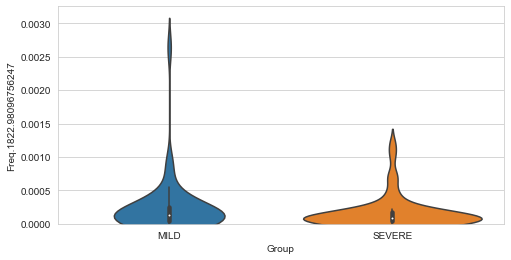

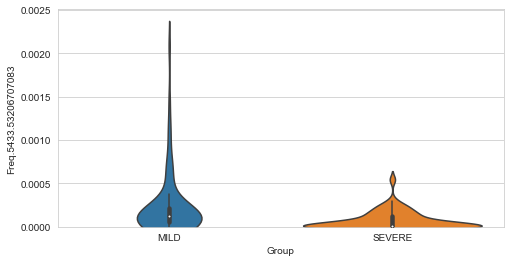

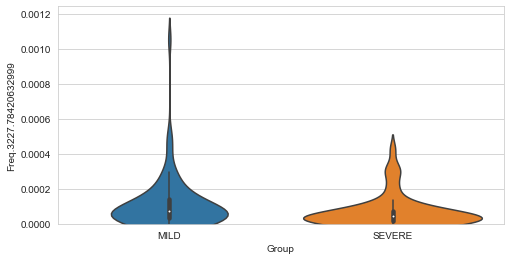

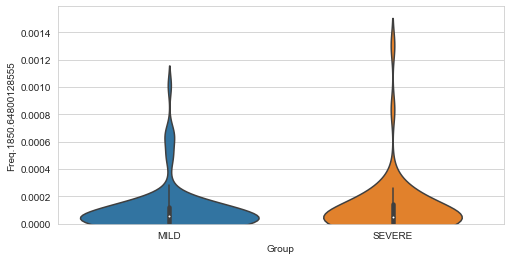

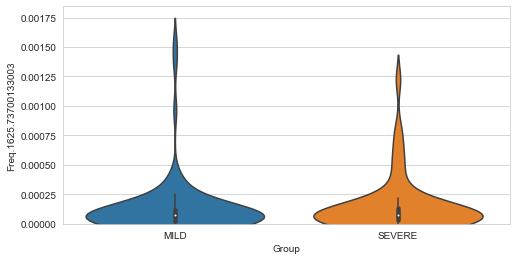

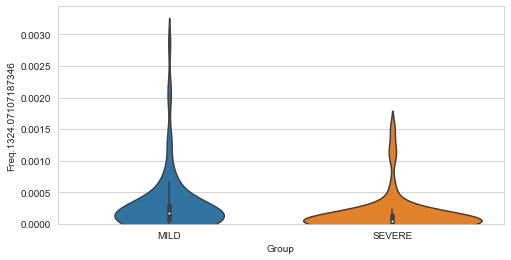

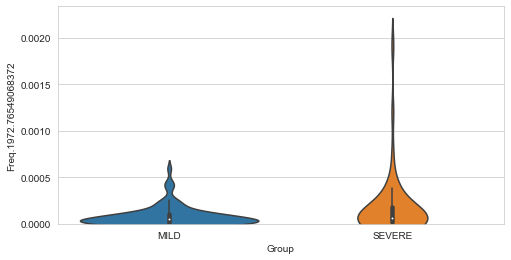

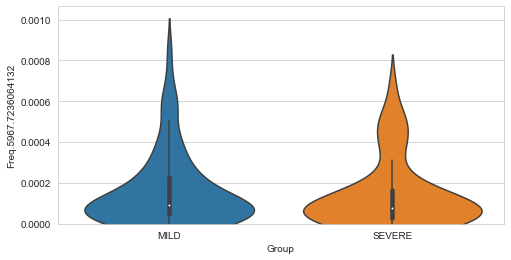

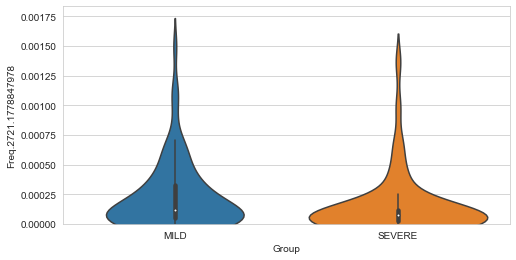

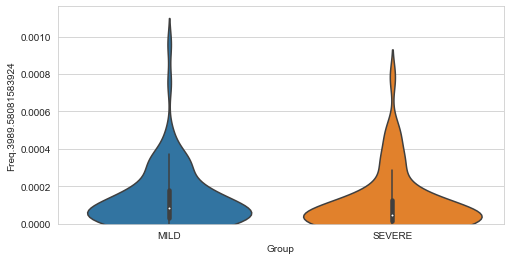

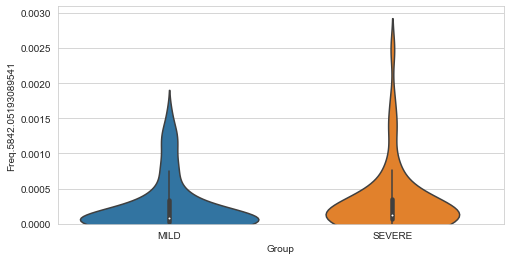

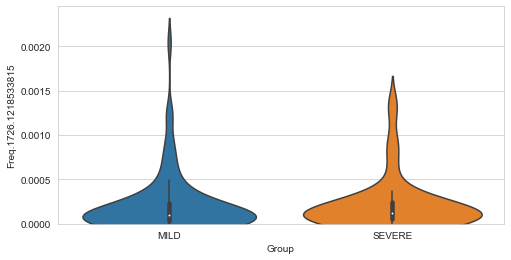

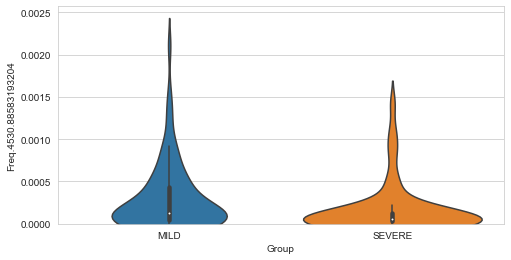

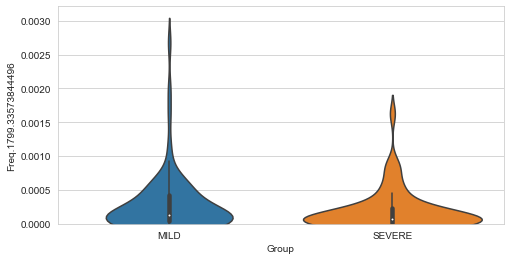

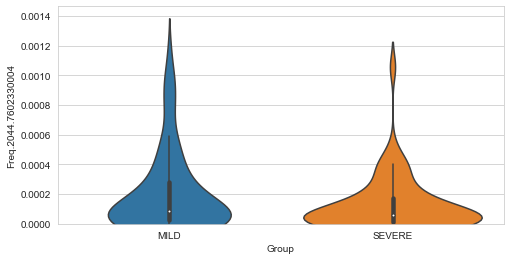

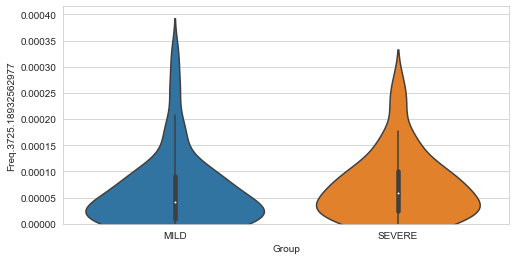

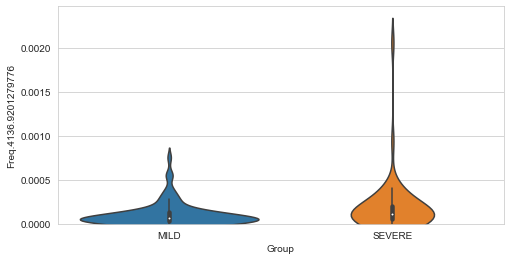

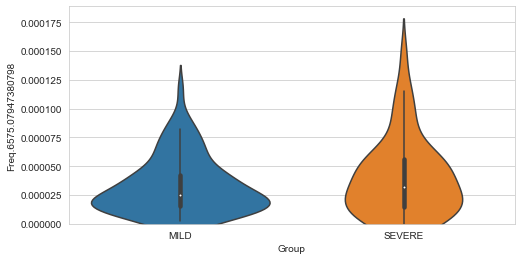

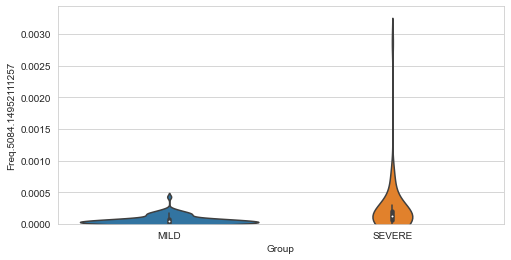

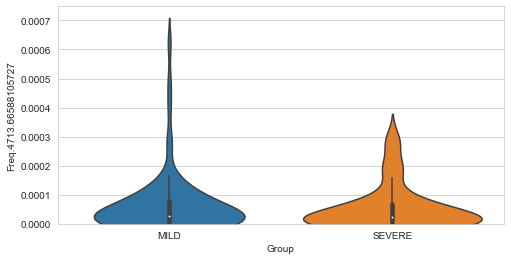

In [19]:
np.random.seed(42)
for coluna in np.random.randint(low=0, high=len(protein_cols), size=20):
    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    sns.violinplot(data=train, y=protein_cols[coluna], x='Group')
    minimo = min(train[protein_cols[coluna]])
    plt.ylim(minimo)

- Apesar da análise das proteínas ter sido aleatória, podemos perceber que a concentração de várias delas variam conforme o caso da doença, o que é um bom indicativo de que o modelo pode aprender a diferenciar a gravidade da doença com base na concentração proteica.

#### 3.6) Analisando as correlações lineares

In [20]:
correlacoes = (
    pd.DataFrame(train.corr()[train.corr() < 1] # tiramos o 1 para ignorar a correlação com si mesma
                 .abs()
                 .unstack()
                 .sort_values()
                 .dropna()
                 )
    .reset_index()
    .rename(columns={'level_0':'Variável 1', 'level_1':'Variável 2', 0:'Correlação Absoluta'})
)
correlacoes.tail(20).sort_values(by='Correlação Absoluta', ascending=False)

,Variável 1,Variável 2,Correlação Absoluta
311921,Freq.4084.57708789945,Freq.4047.41402650454,0.943115
311920,Freq.4047.41402650454,Freq.4084.57708789945,0.943115
311919,Freq.6972.60830431122,Freq.6985.68325773006,0.927200
311918,Freq.6985.68325773006,Freq.6972.60830431122,0.927200
311917,Freq.3034.36754885637,Freq.3039.12149417894,0.917107
311916,Freq.3039.12149417894,Freq.3034.36754885637,0.917107
311915,Freq.1394.04706384502,Freq.1830.53919878988,0.901017
311914,Freq.1830.53919878988,Freq.1394.04706384502,0.901017
311913,Freq.1745.76853759143,Freq.1747.90171482395,0.897974
311912,Freq.1747.90171482395,Freq.1745.76853759143,0.897974


In [21]:
(correlacoes['Correlação Absoluta'] > 0.8).sum()

70

- Percebemos que há varias proteinas com uma correlação linear razoávelmente alta
- Isso não será um grande problema, pois utilizaremos de técnicas de feature selection que tenderão a mitigar o problema das altas correlações